# 4. Generalized linear model

## 4.1 Basic ideas of GLM

### 4.1.1 GLM的一般公式

回归分析中，线性模型的一般预测公式：
$$
y_{hat} = w[0] \cdot x[0]+w[1] \cdot x[1]+ \cdots +w[p] \cdot x[p] + b
$$
对于只有一个特征变量的数据集，公式简化为：
$$
y_{hat} = w[0] \cdot x[0] + b
$$
如果看作直线方程的解析式，$ w[0] $ 是直线的斜率，$ b $ 是y轴的偏移量也就是截距。   <br>
如果换种方式理解，那么模型给出的预测可以看作输入特征的加权和，而 $ w $参数就代表了每个特征的权重，$ w $也可以是负数。

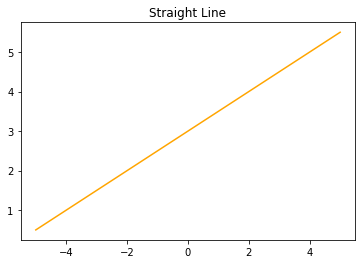

In [18]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5,5,100)
y = 0.5*x + 3
plt.plot(x, y, c = 'orange')
plt.title('Straight Line')
plt.show()

### 4.1.2 线性模型的图形表示

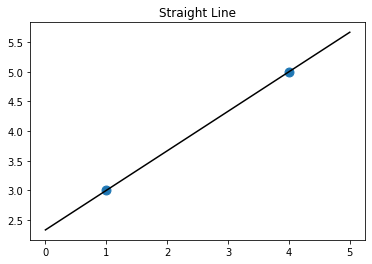

In [4]:
from sklearn.linear_model import LinearRegression

X1 = [[1],[4]]
y1 = [3,5]
lr1 = LinearRegression().fit(X1,y1)
z1 = np.linspace(0,5,20)

plt.scatter(X1,y1,s=80)
plt.plot(z1, lr1.predict(z1.reshape(-1,1)),c='k')
plt.title('Straight Line')
plt.show()


In [6]:
print('\n直线方程为：')
print('============================')
print(' y = {:.3f}'.format(lr1.coef_[0]),'x','+ {:.3f}'.format(lr1.intercept_))
print('============================')
print('\n')


直线方程为：
 y = 0.667 x + 2.333




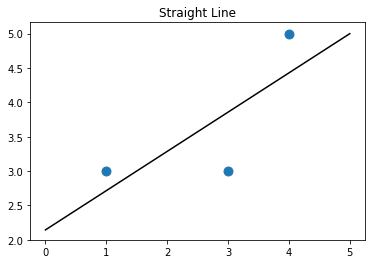

In [8]:
X2 = [ [1],[4],[3] ]
y2 = [ 3,5,3 ]
lr2 = LinearRegression().fit(X2,y2)
z2 = np.linspace(0,5,20)

plt.scatter(X2,y2,s=80)
plt.plot(z2, lr2.predict(z2.reshape(-1,1)),c='k')

plt.title('Straight Line')
plt.show()

In [9]:
print('\n直线方程为：')
print('============================')
print(' y = {:.3f}'.format(lr2.coef_[0]),'x','+ {:.3f}'.format(lr2.intercept_))
print('============================')
print('\n')


直线方程为：
 y = 0.571 x + 2.143




线性模型让自己距离每个数据点的加为最小值，这就是线性回归模型的原理。

Text(0.5, 1.0, 'Linear Regression')

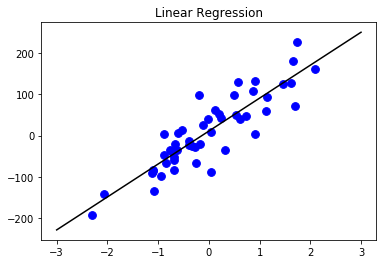

In [10]:
from sklearn.datasets import make_regression

# maked dataset for regression
X3, y3 = make_regression( n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1 )
reg1 = LinearRegression()
reg1.fit(X3,y3)

z3 = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X3,y3,c='b',s=60)
plt.plot(z3,reg1.predict(z3),c='k')
plt.title('Linear Regression')


In [12]:
print('\n')
print('=====================================')
print('直线的系数是 ： {:.2f}'.format(reg1.coef_[0]))
print('直线的截距是 ： {:.2f}'.format(reg1.intercept_))
print('=====================================')
print('\n')



直线的系数是 ： 79.52
直线的截距是 ： 10.92




coef_ 和 intercept_ 这两个属性非常奇怪，它们都是以下划线_结尾。这sciki-learn的一个特点，它总是用下划线作为来自训练数据集的属性的结尾，以便将他们与由用户设置的参数区分开来。

### 4.1.3 线性模型的特点

因为使用线性模型的前提条件，是假设目标$ y $是数据特征的线性组合，但需要特别注意的是，使用一位数据集进行验证会让我们有一点偏颇，而对于数据变量较多的数据集来说，线性模型就显得十分强大。尤其是，当训练数据集的特征变量大于数据点的数量的时候，线性模型可以对训练数据作出近乎完美的预测。 <br>
用于回归分析的线性模型有很多种类。这些模型之间的区别在于如何从训练数据数据中确定模型参数$ w $和$ b$。

## 4.2 最基本的线性模型——线性回归
线性回归，也称为普通最小二乘(OLS)

### 4.2.1 线性回归的基本原理

线性回归的原理 ： 找到当训练数据集中的$ y $ 的预测值和其真实值的平方差最小的时候，所对应的$ w $ 和 $ b $值。 <br>
线性回归没有可供用户调节的参数，这是它的优势，但也代表我们无法控制模型的复杂性。

In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X4,y4 =  make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,random_state=8)
lr4 = LinearRegression().fit(X4_train,y4_train)


In [8]:
print('The result of code running : ')
print('=====================================')
print('lr4.coef_: {}'.format(lr4.coef_[:]))
print('lr4.intercept_: {}'.format(lr4.intercept_))
print('=====================================')

The result of code running : 
lr4.coef_: [70.38592453  7.43213621]
lr4.intercept_: -2.1316282072803006e-14


***分析***：intercept_属性一直是一个浮点数，而ceof_属性则是一个NumPy数组，其中每个特征对应数据中的一个数值。

### 4.2.2 线性回归的性能表现

In [9]:
print('The result of code running : ')
print('===================================')
print('The score of data_train : {:.2f}'.format(lr4.score(X4_train,y4_train )))
print('The score of data_test : {:.2f}'.format(lr4.score(X4_test,y4_test)))
print('===================================')

The result of code running : 
The score of data_train : 1.00
The score of data_test : 1.00


In [10]:
from sklearn.datasets import load_diabetes

X5,y5 = load_diabetes().data, load_diabetes().target
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,random_state=8)
lr5 = LinearRegression().fit(X5_train,y5_train)


In [11]:
print('The result of code running : ')
print('===================================')
print('The score of data_train : {:.2f}'.format(lr5.score(X5_train,y5_train )))
print('The score of data_test : {:.2f}'.format(lr5.score(X5_test,y5_test)))
print('===================================')

The result of code running : 
The score of data_train : 0.53
The score of data_test : 0.46


In [12]:
print('The result of code running : ')
print('=====================================')
print('lr5.coef_: {}'.format(lr5.coef_[:]))
print('lr5.intercept_: {}'.format(lr5.intercept_))
print('=====================================')

The result of code running : 
lr5.coef_: [   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
lr5.intercept_: 152.5624877455247


真实数据比合成的训练数据更复杂得多，模型数据得分降了很多。   <br>
此外，由于线性回归自身的特点，非常容易出现 ***过拟合*** 的现象。  <br>
训练集的得分和测试集的得分之间存在巨大的差异是出现过拟合问题的一个明确信号。需要找一个能够控制模型复杂度的模型。

## 4.3 使用L2正则化的线性模型——岭回归
岭回归也是回归分析中常用的线性模型，是一种改良的最小二乘。

### 4.3.1 岭回归的原理
在岭回归中是通过改变其alpha参数来控制减小特征变量系数的程度。这种通过保留全部特征变量，只是降低特征变量的系数值来避免过度拟合的方法，称为L2正则化。<br>
岭回归在scikit-learn中是通过linear_model.Ridge函数来调用的。

In [13]:
from sklearn.linear_model import Ridge

# alpha = 1
ridge1 = Ridge().fit(X5_train,y5_train)

print('The result of code runnning : ')
print('=======================================')
print('The score of data_train for Ridge : {:.2f}'.format(ridge1.score(X5_train,y5_train)))
print('The score of data_test for Ridge  : {:.2f}'.format(ridge1.score(X5_test,y5_test)))
print('=======================================')

The result of code runnning : 
The score of data_train for Ridge : 0.43
The score of data_test for Ridge  : 0.43


岭回归发生***过拟合*** 的可能性大大降低。可以说，复杂度越低的模型，在训练数据集上的表现越差，但是其泛化的能力会更好。

### 4.3.2 岭回归的参数调节
岭回归：在模型的简单性（是系数趋近于零）和它在训练集上的性能之间取得平衡的一种模型。  <br>
可以使用alpha参数控制模型简单性还是在训练集上的性能更高。默认参数alpha是1  <br>
***alpha的取值并没有一定的规则。alpha的最佳设置取决于使用的特征数据集，增加alpha值会降低特征变量的系数，使其趋于零，从而降低训练集的性能，但更有助于泛化。***

In [14]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X5_train,y5_train)

print('The result of code runnning : ')
print('=======================================')
print('The score of data_train for Ridge : {:.2f}'.format(ridge10.score(X5_train,y5_train)))
print('The score of data_test for Ridge  : {:.2f}'.format(ridge10.score(X5_test,y5_test)))
print('=======================================')

The result of code runnning : 
The score of data_train for Ridge : 0.15
The score of data_test for Ridge  : 0.16


In [15]:
# alpha = 0.1

ridge01 = Ridge(0.1).fit(X5_train,y5_train)

print('The result of code runnning : ')
print('=======================================')
print('The score of data_train for Ridge : {:.2f}'.format(ridge01.score(X5_train,y5_train)))
print('The score of data_test for Ridge  : {:.2f}'.format(ridge01.score(X5_test,y5_test)))
print('=======================================')

The result of code runnning : 
The score of data_train for Ridge : 0.52
The score of data_test for Ridge  : 0.47


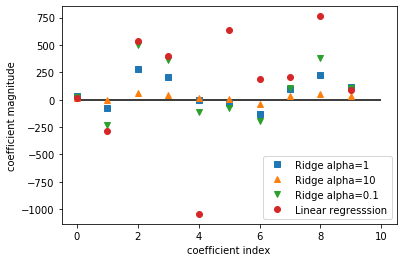

In [19]:
# see different model's coef_
plt.plot(ridge1.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

# LinearRegression
plt.plot(lr5.coef_,'o',label='Linear regresssion')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0,len(lr5.coef_))
plt.legend()
plt.show()

***分析***   <br>
横轴是coef_属性，纵轴显示特征变量的系数量级。 <br>
另一个帮助更好理解正则化对模型影响的方法：取一个固定的alpha值，然后改变训练数据集的数据量。得到随数据集大小而不断改变模型评分折线图，此折线也称之为学习曲线（learning curves)。

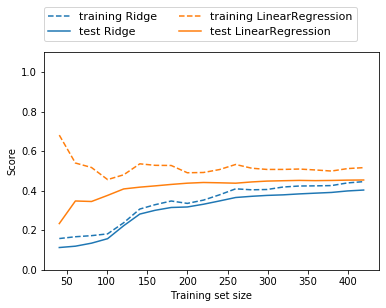

In [26]:
from sklearn.model_selection import learning_curve,KFold

def plot_learning_curve(est, X, y):
    training_set_size,train_scores, test_scores = learning_curve(est, X,y,train_sizes=np.linspace(.1,1,20),cv=KFold(20,shuffle=True,random_state=1) )
    estimate_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1),'--',
                   label="training "+estimate_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
            label="test "+estimate_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0,1.1)
    
plot_learning_curve(Ridge(alpha=1), X5, y5)
plot_learning_curve(LinearRegression(),X5,y5)
plt.legend(loc=(0,1.05),ncol=2,fontsize=11)
plt.show()

***结果分析***   <br>
1.两个模型训练数据集的得分都比测试数据集的得分更高。  <br>
2.岭回归在图像中训练数据集的得分要比线性回归的得分低。但是岭回归在测试数据集的得分与训练数据集的得分差异更小。尤其是在数据子集比较小的情况下。   <br>
3.在数据量小于50条的情况下，线性回归几乎不能让机器学到任何东西。   <br>
4.如果有足够多的数据，正则化就显得不是那么重要，岭回归和线性回归的表现也就相差无几。      <br>

***注意***
随着数据量的增加，线性回归在训练数据集的得分是下降的，说明随着数据增加，线性回归模型就越不容易产生过拟合的现象。

## 4.4 使用L1正则化的线性模型——套索回归(lasso)


### 4.4.1 套索回归的原理
套索回归也会将系数限制在非常接近0的范围内，但进行限制的方式稍微有点不同，***L1正则化分解***。   <br>
L1正则化会导致在使用套索回归的时候，有一部分特征的系数正好=0。即一些特征会彻底被模型忽略掉。可以突出体现模型中最重要的特征。

In [30]:
from sklearn.linear_model import Lasso

lasso1 = Lasso().fit(X5_train,y5_train)
print('The result of code running : ')
print('========================================')
print('The lasso score on data_train : {:.2f}'.format(lasso1.score(X5_train,y5_train)))
print('The lasso score on data_test  : {:.2f}'.format(lasso1.score(X5_test,y5_test)))
print('The characteristic number oof lasso : {}'.format(np.sum(lasso1.coef_ !=0)))

The result of code running : 
The lasso score on data_train : 0.36
The lasso score on data_test  : 0.37
The characteristic number oof lasso : 3


### 4.4.2 套索回归的参数调节
改变alpha，改变最大迭代次数mia_iter

In [32]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X5_train,y5_train)

print('The result of code running : ')
print('=====================================')
print('alpha=0.1, the socre of lasso on  data_train : {:.2f}'.format(lasso01.score(X5_train,y5_train)))
print('alpha=0.1, the socre of lasso on  data_test  : {:.2f}'.format(lasso01.score(X5_test,y5_test)))
print('alpha=0.1,The characteristic number oof lasso : {}'.format(np.sum(lasso01.coef_ !=0)))
print('=====================================')

The result of code running : 
alpha=0.1, the socre of lasso on  data_train : 0.52
alpha=0.1, the socre of lasso on  data_test  : 0.48
alpha=0.1,The characteristic number oof lasso : 7


***结果分析***   <br>
降低alpha的值可以拟合出更复杂的模。如果alpha的值太低，就等于把正则化的效果去除了。过拟合。

In [34]:
# alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X5_train,y5_train)
print('The result of code running : ')
print('========================================')
print('The lasso score on data_train : {:.2f}'.format(lasso00001.score(X5_train,y5_train)))
print('The lasso score on data_test  : {:.2f}'.format(lasso00001.score(X5_test,y5_test)))
print('The characteristic number oof lasso : {}'.format(np.sum(lasso00001.coef_ !=0)))
print('=====================================')

The result of code running : 
The lasso score on data_train : 0.53
The lasso score on data_test  : 0.46
The characteristic number oof lasso : 10


***结果分析***    <br>
套索回归使用了全部的特征。在测试数据集中的得分也稍微低于alpha=0.1的情况，这也说明降低alpha值会让模型倾向于出现过拟合的现象。

### 4.4.3 套索回归与岭回归的对比

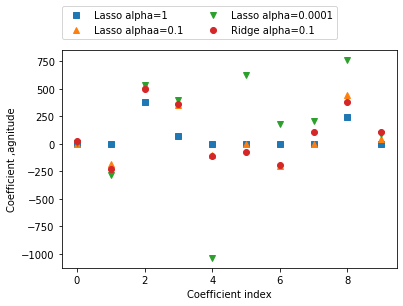

In [44]:
# alpha = 1
plt.plot(lasso1.coef_, 's', label = 'Lasso alpha=1')
# alpha = 0.1
plt.plot(lasso01.coef_, '^', label = 'Lasso alphaa=0.1')
# alpha = 0.0001
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha=0.0001')

# alpha=0.1 ,Ridge
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
#plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient ,agnitude')
plt.show()

***结果分析***  <br>
在实践中，岭回归往往是这两个模型的优选。但是如果数据特征过多，而其中只有一小部分是真正需要的，那么套索回归是更好的选择。同样如果需要对模型进行解释的话，套索回归会让模型更容易被人理解，因为它只使用输入的特征值中的一部分。


***注意***   <br>
scikit-learn 还提供了一种称为***弹性网模型（Elastic Net)***，综合了套索回归和岭回归的惩罚因子。实践中，两个模型的组合是效果最好的，代价是需要调整两个参数，L1正则化参数和L2正则化参数。

## 4.5 小结